

---Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("/content/insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Data Analysis

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
print('Top 5 charges:')
df.nlargest(5,['charges'])

Top 5 charges:


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [10]:
print('No. of Smokers and Non-smokers')
df['smoker'].value_counts()

No. of Smokers and Non-smokers


no     1064
yes     274
Name: smoker, dtype: int64

Data is imbalanced.

In [11]:
print('No. of males and females')
df['sex'].value_counts()

No. of males and females


male      676
female    662
Name: sex, dtype: int64

In [12]:
sm1=df['smoker'][df.smoker=='no'][df.age>50].count()
print('Cases with age above 50 and non-smoker:',sm1)
sm2=df['smoker'][df.smoker=='yes'][df.age>50].count()
print('Cases with age above 50 and smoker:',sm2)

Cases with age above 50 and non-smoker: 292
Cases with age above 50 and smoker: 64


In [13]:
alpha=df['smoker'][df.smoker=='yes'][df.charges>13270].count()
print('Cases with charges above its mean and who are smoker',alpha)
beta=df['smoker'][df.smoker=='no'][df.charges>13270].count()
print('Cases with charges above its mean and who are non-smoker',beta)


Cases with charges above its mean and who are smoker 273
Cases with charges above its mean and who are non-smoker 147


Charges are high for those who smokes.

In [14]:
bmi1=df['bmi'][df.bmi>=18.5][ df.bmi<=24.9][df.charges>13270].count()
print("Cases with healthy bmi and above mean charges",bmi1)


Cases with healthy bmi and above mean charges 68


Indicates charges are not so high for person having healthy BMI.

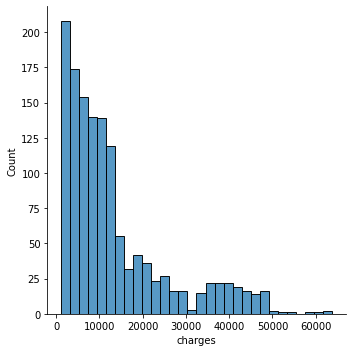

In [15]:
sns.displot(df['charges'])

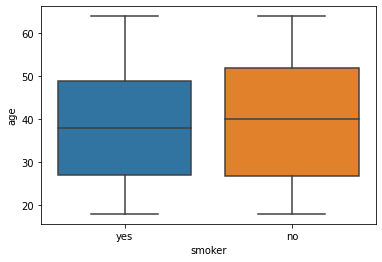

In [16]:
sns.boxplot(x='smoker',y='age',data=df)

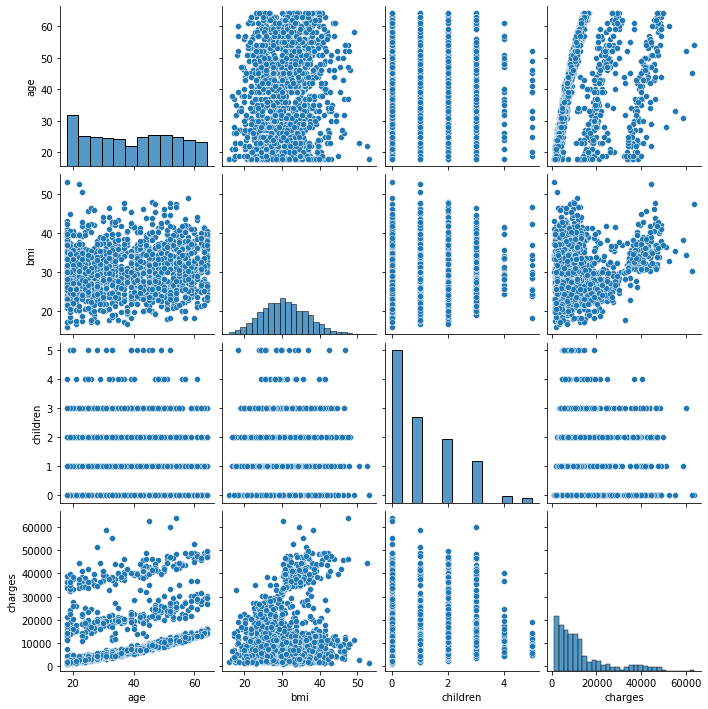

In [17]:
sns.pairplot(df)

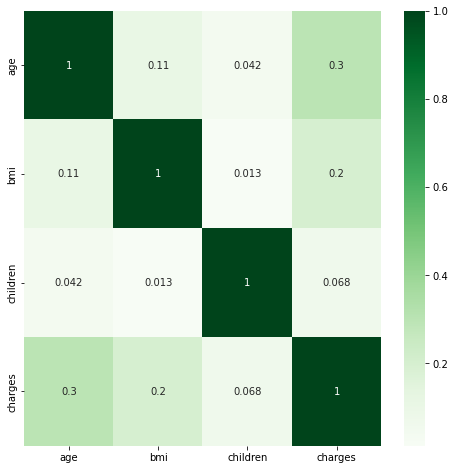

In [18]:
plt.figure(figsize=(8,8))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Greens',cbar=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["sex"] = lb_make.fit_transform(df["sex"])
df["smoker"] = lb_make.fit_transform(df["smoker"])
df["region"] = lb_make.fit_transform(df["region"])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Dataset Development:

In [20]:
import math 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

x=df.drop('charges',axis=1)
y=df['charges']
print(x.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("Shape of X_test: ", X_test.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_train: ", y_train.shape)

(1338, 6)
(1338,)
Shape of X_test:  (268, 6)
Shape of X_train:  (1070, 6)
Shape of y_test:  (268,)
Shape of y_train:  (1070,)


In [21]:
def evaluating_model(y_test,y_pred):
  print("r2_score: ", r2_score(y_test,y_pred))
  print("MAE: ", mean_absolute_error(y_test,y_pred))
  print("MSE: ", mean_squared_error(y_test,y_pred))
  print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

In [22]:
#Linear Regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
y_pred = lr_reg.predict(X_test)
evaluating_model(y_test,y_pred)


r2_score:  0.7998747145449959
MAE:  3930.3332739011403
MSE:  31845929.13415943
RMSE:  5643.219748880902


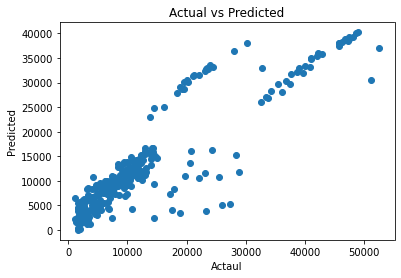

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actaul")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lr_reg_pip=make_pipeline(StandardScaler(),LinearRegression())
lr_reg_pip.fit(X_train,y_train)
y_pred2 = lr_reg_pip.predict(X_test)
evaluating_model(y_test,y_pred2)


r2_score:  0.7998747145449958
MAE:  3930.333273901142
MSE:  31845929.134159446
RMSE:  5643.219748880903


In [25]:
from sklearn.linear_model import Lasso 

Lasso = Lasso()
Lasso.fit(X_train, y_train)
y_pred3 = Lasso.predict(X_test )
evaluating_model(y_test,y_pred3)
print('Y-intercept : ', Lasso.intercept_)


r2_score:  0.7998461817644502
MAE:  3931.0615784053816
MSE:  31850469.55445261
RMSE:  5643.622024414162
Y-intercept :  -11661.235307188987


Lasso Regression shows little improvement over Normal linear regression and Normalized linear regression


In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


param_grid = {'C':[1,10,100,1000,10000],
              'gamma':[100,10,1,0.1,0.01,.001],
              'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

svc = SVR()
svc.fit(X_train,y_train)
y_pred4=svc.predict(X_test)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=1, gamma=100, kernel=rbf;, score=-0.086 total time=   0.1s
[CV 2/5] END .......C=1, gamma=100, kernel=rbf;, score=-0.038 total time=   0.1s
[CV 3/5] END .......C=1, gamma=100, kernel=rbf;, score=-0.086 total time=   0.1s
[CV 4/5] END .......C=1, gamma=100, kernel=rbf;, score=-0.137 total time=   0.1s
[CV 5/5] END .......C=1, gamma=100, kernel=rbf;, score=-0.169 total time=   0.1s
[CV 1/5] END ........C=1, gamma=10, kernel=rbf;, score=-0.086 total time=   0.1s
[CV 2/5] END ........C=1, gamma=10, kernel=rbf;, score=-0.038 total time=   0.1s
[CV 3/5] END ........C=1, gamma=10, kernel=rbf;, score=-0.086 total time=   0.1s
[CV 4/5] END ........C=1, gamma=10, kernel=rbf;, score=-0.137 total time=   0.1s
[CV 5/5] END ........C=1, gamma=10, kernel=rbf;, score=-0.169 total time=   0.1s
[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.086 total time=   0.1s
[CV 2/5] END .........C=1, gamma=1, kernel=rbf;

In [27]:
grid.best_estimator_

SVR(C=10000, gamma=0.01)

In [28]:
svc = SVR(C=10000, gamma=0.01)
svc.fit(X_train,y_train)
y_pred4=svc.predict(X_test)
evaluating_model(y_test,y_pred4)

r2_score:  0.32365543620902093
MAE:  4768.881343924602
MSE:  107626684.952833
RMSE:  10374.32816874582


SVR working not upto the mark.

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeRegressor(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    return best_model


randomized_search(params={
                          'splitter':['random', 'best'],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                        
                         })



DecisionTreeRegressor(max_features='auto', min_samples_leaf=0.03,
                      min_samples_split=6, random_state=2)

In [39]:
df_reg=DecisionTreeRegressor(max_features='auto', min_samples_leaf=0.03,
                      min_samples_split=6, random_state=2)
df_reg.fit(X_train,y_train)
y_pred5 = df_reg.predict(X_test)
evaluating_model(y_test,y_pred5)

r2_score:  0.8809436349930304
MAE:  2718.123709412825
MSE:  18945434.87776831
RMSE:  4352.635394536086


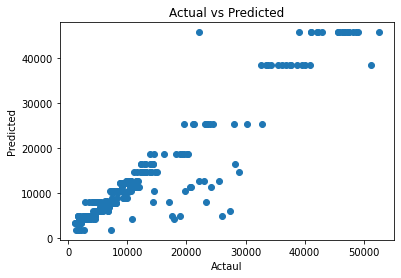

In [31]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actaul")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor

randomized_search(params={'min_samples_leaf':[1,2,4,10,20,30],
                          'max_features':['auto', 0.8, 0.7, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], },clf=RandomForestRegressor(random_state=5))


RandomForestRegressor(max_depth=8, max_features=0.7, min_samples_leaf=10,
                      random_state=5)

In [48]:
rgr=RandomForestRegressor(max_depth=8, max_features=0.7, min_samples_leaf=10,
                      random_state=5)
rgr.fit(X_train,y_train)
y_pred6 = rgr.predict(X_test)
evaluating_model(y_test,y_pred6)

r2_score:  0.9015605245402849
MAE:  2457.9637711731625
MSE:  15664670.020914283
RMSE:  3957.8617991175843


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


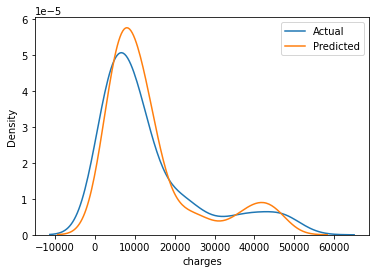

In [66]:
sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred6, hist = False, label = 'Predicted')
plt.legend()

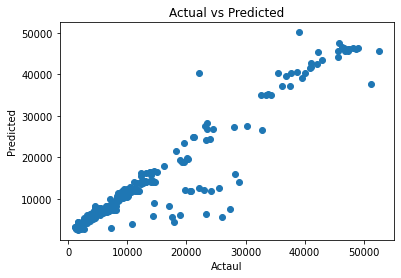

In [33]:
plt.scatter(y_test, y_pred6)
plt.xlabel("Actaul")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Random Forest Regressor slightly goes better than Decsion tree Regression.

In [53]:
from xgboost import XGBRegressor
xgb1=XGBRegressor()
xgb1.fit(X_train, y_train)
y_pred7 = xgb1.predict(X_test)
evaluating_model(y_test,y_pred7)


[03:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score:  0.8977839346540404
MAE:  2416.078533729652
MSE:  16265638.627218492
RMSE:  4033.068140661461


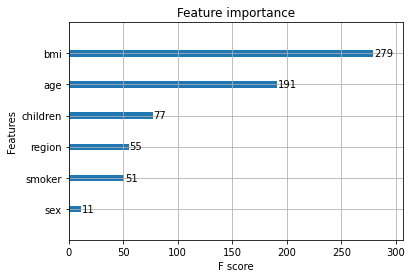

In [58]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor()
gdbt.fit(X_train,y_train)
y_pred8 = gdbt.predict(X_test)
evaluating_model(y_test,y_pred8)

r2_score:  0.89821322640669
MAE:  2434.332485863894
MSE:  16197325.446794154
RMSE:  4024.590096742046


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


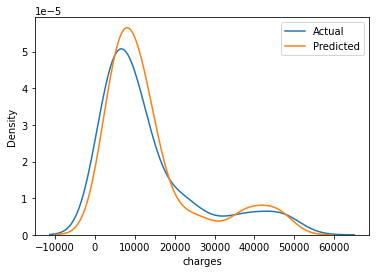

In [64]:
sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred8, hist = False, label = 'Predicted')
plt.legend()

Conclusion:
Random forest regressor works best among all and GradientBoostingRegressor works slight better than Xgboost.

In [59]:
import joblib 
joblib.dump(rgr, 'model2.pkl') 
model = joblib.load('model2.pkl' ) 
model.predict(X_test)

array([11908.19305761, 10542.85367506, 45029.0223511 , 14218.67885329,
       10577.32009237,  6264.89060764,  2764.42259359, 13384.46018389,
        7878.54933098,  7058.08041094,  7513.22939295, 12967.26730741,
        8437.27426274,  5495.6607129 , 20464.75382771, 12167.63623923,
       14031.18861432,  7372.17759502,  7099.58229764, 34397.47616553,
       24878.41192481, 15405.55803369, 12182.59856379, 26952.81685516,
        3318.19083489,  8137.92502241,  5622.84911592,  8226.14348554,
        4373.95613961, 10652.72267699,  8106.48861309, 46416.60416777,
       14309.42406725, 11357.33923764, 18020.46790033,  4592.80940531,
        9733.23781775, 38574.46314719, 39308.83942676,  3188.66525888,
        6299.35517215,  4310.41837045, 21220.31080927, 46215.32722609,
       37252.95618046,  6054.72610822, 12167.63623923,  7037.79503717,
        6861.73052859, 13391.75081926,  4495.66410488,  6435.05412685,
       26585.56778003, 44965.65595719, 11605.2824325 ,  5591.16186378,
      